In [99]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [116]:
df=pd.read_csv("D:\\Machine Learning\\ML\\13_kmeans\\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

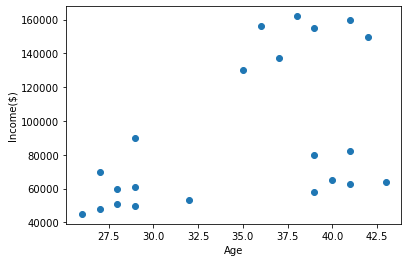

In [101]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [102]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [103]:
df['clusters']=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [104]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

Text(0, 0.5, 'Income ($)')

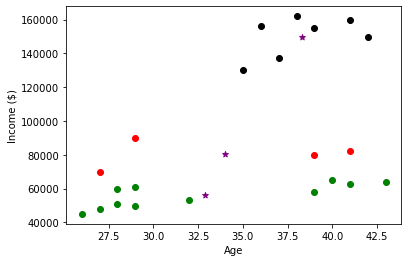

In [105]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1['Age'],df1['Income($)'],c='red')
plt.scatter(df2['Age'],df2['Income($)'],c='black')
plt.scatter(df3['Age'],df3['Income($)'],c='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Preprocessing using MinMaxscaler

In [106]:
scaler=MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [117]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


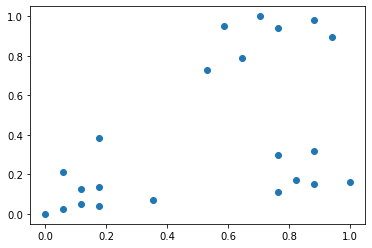

In [108]:
plt.scatter(df.Age,df['Income($)'])

In [109]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [110]:
df['cluster']=y_predicted

Text(0, 0.5, 'Income ($)')

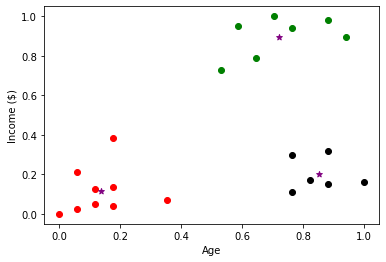

In [111]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'],c='red')
plt.scatter(df2['Age'],df2['Income($)'],c='black')
plt.scatter(df3['Age'],df3['Income($)'],c='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Elbow point

In [112]:
k_rnge=range(1,10)
ssc=[]
for k in k_rnge:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    ssc.append(km.inertia_)

C:\Users\Affex Jain\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [113]:
ssc

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.2244333448724142,
 0.17299621932455464,
 0.13265419827245162,
 0.10383752586603562]

Text(0, 0.5, 'Sum of squared error')

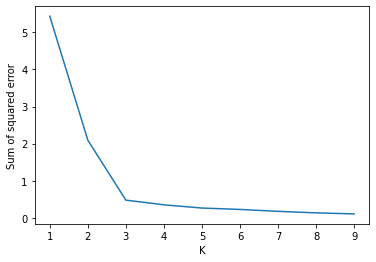

In [118]:
plt.plot(k_rnge,ssc)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

# K=3(elbow at 3)